In [215]:
import pandas as pd
import yfinance as yf
import time
from alpha_vantage.timeseries import TimeSeries
import requests
from datetime import datetime
import plotly.graph_objects as go
from pathlib import Path
import hvplot.pandas

import plotly.graph_objects as go
import panel as pn
from panel.interact import interact
from panel import widgets
pn.extension()

ticker_df = {}
start_date = '2019-01-01'
end_date = '2021-01-23'



In [216]:
def pull_alpha_data(function, ticker): 

    base_url = 'https://www.alphavantage.co/query?'
    params = {'function': function,
             'symbol': ticker,
             'apikey': '0GTFFL66G1VMDZJ5'}

    response = requests.get(base_url, params=params)
    data = response.json()
    return data

In [203]:
short_ticker_list = ['NLOK','XRX','SNX','NCR','INTC','COHR','QCOM','JBL','PTC','FSLR','GRWG','OGI',
                     'EGOV','CGC','HEXO','APHA','TRPXY','CRON','CGC','VW','LNG','OKE','OKE','WMB',
                     'EQT','CVX','VLO','TGE','XOM','MUR','UNM','VIRT','AFL','WTM','KKR','AFL','PYPL','SIVB',
                     'VIRL','XLF','EAF','AL','MAS','ROK','AGCO','VRSK','GNRC','AAXN','SPCE','MMM' 'XOM', 'CVX',
                     'BP', 'RDS', 'COP', 'PSX', 'HAL', 'LILA', 'HSIC', 'INCY', 'COMP', 'DJIA', 'SPX', 'GRVY', 
                     'RIOT', 'NDX', 'ALGN', 'TTWO', 'ATVI', 'MU', 'PYL', 'MSFT', 'AAPL', 'CSCO', 'AMD', 'UNH', 
                     'SYK', 'AGN', 'VAR','BSX', 'TTD', 'NFLX', 'ZM', 'GOOGL', 'BA', 'HD', 'AMZ', 'LMT', 'AMD', 
                     'JMIA', 'FB', 'TSLA', 'AAPL', 'AAL', 'DAL', 'UAL', 'LUV', 'XOM', 'CVX', 'BP', 'RDS', 'COP', 'PSX', 'HAL']
#for loop for iterating through ticker list
for ticker in short_ticker_list:
    print(f'Checking Data for Ticker {ticker}')
    #statement for continuing loop in the case of an error from Yahoo Finance Package & getting ticker symbol data
    try: 
        data_df = yf.download(ticker, start=start_date, end=end_date)
        data_df['ticker'] = ticker
        data_df.reset_index(inplace=True)
        #Include the header on the 1st file write 
        if short_ticker_list.index(ticker) == 0:
            mode = None
            header = True
        #ignoring header on subsequent writes
        else:
            mode = 'a'
            header = False
        #writing dataframe to csv
        data_df.to_csv('project_ticker_data.csv',mode='a',header=header)
        time.sleep(2)
        
    except:
        print(f'Data for ticker: {ticker} is not available')
        pass

Checking Data for Ticker NLOK
[*********************100%***********************]  1 of 1 completed
Checking Data for Ticker XRX
[*********************100%***********************]  1 of 1 completed
Checking Data for Ticker SNX
[*********************100%***********************]  1 of 1 completed
Checking Data for Ticker NCR
[*********************100%***********************]  1 of 1 completed
Checking Data for Ticker INTC
[*********************100%***********************]  1 of 1 completed
Checking Data for Ticker COHR
[*********************100%***********************]  1 of 1 completed
Checking Data for Ticker QCOM
[*********************100%***********************]  1 of 1 completed
Checking Data for Ticker JBL
[*********************100%***********************]  1 of 1 completed
Checking Data for Ticker PTC
[*********************100%***********************]  1 of 1 completed
Checking Data for Ticker FSLR
[*********************100%***********************]  1 of 1 completed
Checking Data f

In [12]:
short_ticker_list = ['NLOK','XRX','SNX','NCR','INTC','COHR','QCOM','JBL','PTC','FSLR','GRWG','OGI',
                     'EGOV','CGC','HEXO','APHA','TRPXY','CRON','CGC','VW','LNG','OKE','OKE','WMB',
                     'EQT','CVX','VLO','TGE','XOM','MUR','UNM','VIRT','AFL','WTM','KKR','AFL','PYPL','SIVB',
                     'VIRL','XLF','EAF','AL','MAS','ROK','AGCO','VRSK','GNRC','AAXN','SPCE','MMM' 'XOM', 'CVX',
                     'BP', 'RDS', 'COP', 'PSX', 'HAL', 'LILA', 'HSIC', 'INCY', 'COMP', 'DJIA', 'SPX', 'GRVY', 
                     'RIOT', 'NDX', 'ALGN', 'TTWO', 'ATVI', 'MU', 'PYL', 'MSFT', 'AAPL', 'CSCO', 'AMD', 'UNH', 
                     'SYK', 'AGN', 'VAR','BSX', 'TTD', 'NFLX', 'ZM', 'GOOGL', 'BA', 'HD', 'AMZ', 'LMT', 'AMD', 
                     'JMIA', 'FB', 'TSLA', 'AAPL', 'AAL', 'DAL', 'UAL', 'LUV', 'XOM', 'CVX', 'BP', 'RDS', 'COP', 'PSX', 'HAL']


#short_ticker_list = ['NLOK','XRX','SNX','NCR','INTC','COHR','QCOM','JBL','PTC','FSLR','GRWG','OGI']


#for loop for iterating through ticker list,
for ticker in short_ticker_list:
    print(f'Checking Data for Ticker {ticker}')
    #statement for continuing loop in the case of an error from Yahoo Finance Package & getting ticker symbol data
    try:
        data_df_2 = pull_alpha_data('OVERVIEW', ticker)
        data_df_df = pd.DataFrame([data_df_2])
        data_df_df['ticker'] = ticker     
        data_df_df.reset_index(inplace=True)
        #Include the header on the 1st file write 

        #print(short_ticker_list.index(ticker))    
        #input('Hold')

        if short_ticker_list.index(ticker) == 0:
            mode = 'w'
            header = True
        #ignoring header on subsequent writes
        else:
            mode = 'a'
            header = False
        #writing dataframe to csv
        
        data_df_df.to_csv('project_ticker_data_2.csv',mode=mode, header=header)
    
        time.sleep(15)
        
    except:
        print(f'Data for ticker: {ticker} is not available')
        pass

Checking Data for Ticker NLOK
Checking Data for Ticker XRX
Checking Data for Ticker SNX
Checking Data for Ticker NCR
Checking Data for Ticker INTC
Checking Data for Ticker COHR
Checking Data for Ticker QCOM
Checking Data for Ticker JBL
Checking Data for Ticker PTC
Checking Data for Ticker FSLR
Checking Data for Ticker GRWG
Checking Data for Ticker OGI
Checking Data for Ticker EGOV
Checking Data for Ticker CGC
Checking Data for Ticker HEXO
Checking Data for Ticker AMRS
Checking Data for Ticker APHA
Checking Data for Ticker TRPXY
Checking Data for Ticker CRON
Checking Data for Ticker CGC
Checking Data for Ticker VW
Checking Data for Ticker LNG
Checking Data for Ticker OKE
Checking Data for Ticker OKE
Checking Data for Ticker WMB
Checking Data for Ticker EQT
Checking Data for Ticker CVX
Checking Data for Ticker VLO
Checking Data for Ticker TGE
Checking Data for Ticker XOM
Checking Data for Ticker MUR
Checking Data for Ticker UNM
Checking Data for Ticker VIRT
Checking Data for Ticker AFL
C

In [217]:
project_1 = pd.read_csv('project_ticker_data.csv')
project_2 = pd.read_csv('project_ticker_data_2.csv')

project_1.set_index('ticker',inplace=True)
project_1.drop(columns=['Unnamed: 0'],inplace=True)

project_2.set_index('ticker',inplace=True)
project_2.drop(columns=['Unnamed: 0'],inplace=True)
    


## data_df_

In [218]:
clean_data = project_1[[ 'Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
clean_data.head()

Date                Open                High  \
ticker                                                       
NLOK    2019-01-02  18.450000762939453  19.110000610351562   
NLOK    2019-01-03  18.770000457763672  18.899999618530273   
NLOK    2019-01-04    18.8700008392334  19.540000915527344   
NLOK    2019-01-07  19.389999389648438  19.690000534057617   
NLOK    2019-01-08  19.479999542236328  19.850000381469727   

                       Low               Close   Volume  
ticker                                                   
NLOK    18.360000610351562  18.940000534057617  4306400  
NLOK     18.31999969482422  18.579999923706055  7121200  
NLOK    18.770000457763672  19.360000610351562  6700800  
NLOK      19.1200008392334  19.329999923706055  7724000  
NLOK    19.459999084472656  19.579999923706055  6737400

In [219]:
clean_data_2 = project_2[['QuarterlyEarningsGrowthYOY', 'QuarterlyRevenueGrowthYOY', 'ProfitMargin',
                          '52WeekHigh', '52WeekLow', 'Beta', 'EPS', '50DayMovingAverage', '200DayMovingAverage', 'Sector']]

clean_data_2.head()

QuarterlyEarningsGrowthYOY  QuarterlyRevenueGrowthYOY  ProfitMargin  \
ticker                                                                        
NLOK                        -0.910                      0.030        1.3180   
XRX                         -0.899                     -0.210        0.0273   
SNX                          0.213                      0.127        0.0214   
NCR                          1.148                     -0.109        0.0723   
INTC                        -0.097                     -0.011        0.2684   

        52WeekHigh  52WeekLow    Beta     EPS 50DayMovingAverage  \
ticker                                                             
NLOK       24.2366    14.8509  1.0368  5.7018            20.6836   
XRX        36.6496    14.0162  1.8524   0.852            22.5579   
SNX        91.6200    21.1674  1.4827  10.214            84.3818   
NCR        39.3000    10.5500  1.8356   3.157            35.2015   
INTC       66.7652    42.7811  0.7348    4.94            51.9827   

       200DayMovingAverage      Sector  
ticker                                  
NLOK               20.9569  Technology  
XRX                19.8935  Technology  
SNX                63.3475  Technology  
NCR                24.9955  Technology  
INTC               50.5372  Technology

In [220]:
new_data = clean_data.join(clean_data_2, how='outer', on=clean_data.index)
new_data.dropna(inplace=True)
new_data.drop(columns='key_0', inplace=True)
#new_data.drop(axis=0, index='ticker', inplace=True)
new_data.index.name = 'Ticker'

new_data.to_csv('join_data.csv')

In [221]:
df = new_data.sort_values(['QuarterlyEarningsGrowthYOY', 'Date'], ascending=False)

sector_df = df.groupby(['Sector']).max()

#sector_df = sector_df.sort_values('QuarterlyEarningsGrowthYOY', ascending=False)

sector_df.head()

Date  QuarterlyEarningsGrowthYOY  \
Sector                                                           
Basic Materials         2021-01-22                       0.000   
Communication Services  2021-01-22                      86.968   
Consumer Cyclical       2021-01-22                       1.041   
Energy                  2021-01-22                      11.591   
Financial Services      2021-01-22                       3.915   

                        QuarterlyRevenueGrowthYOY  ProfitMargin  52WeekHigh  \
Sector                                                                        
Basic Materials                            -0.020       -2.2422     12.2100   
Communication Services                      3.665        0.3390   1932.0800   
Consumer Cyclical                           1.526        0.0994    895.9000   
Energy                                     -0.033        0.1133    106.5620   
Financial Services                          3.496        0.3357   1166.7825   

                        52WeekLow    Beta     EPS 50DayMovingAverage  \
Sector                                                                 
Basic Materials            1.4000   1.052  -3.388             7.1503   
Communication Services  1008.8700    None    6.08            89.9342   
Consumer Cyclical        138.3077    None  11.561           743.4597   
Energy                    49.4038  3.3256   4.099            89.4173   
Financial Services       629.2100  2.1465  89.161            44.9573   

                       200DayMovingAverage  
Sector                                      
Basic Materials                     4.1202  
Communication Services             82.5277  
Consumer Cyclical                 490.3843  
Energy                             83.4052  
Financial Services                919.3216

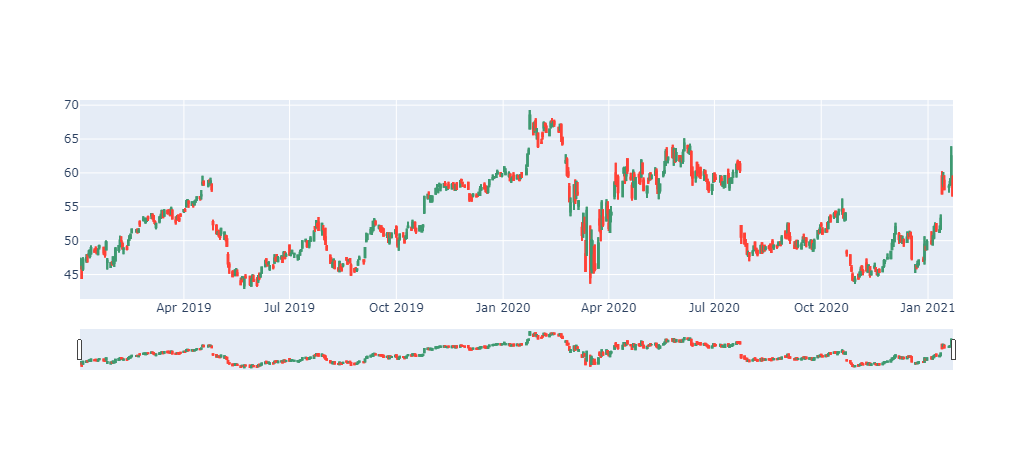

In [228]:
# Plot Bar Charts for ATVI

df = pd.read_csv('project_ticker_data.csv')
df.set_index('ticker',inplace=True)
df.drop(columns=['Unnamed: 0'],inplace=True)
atvi_df = df.loc['ATVI']
fig = go.Figure(data=[go.Candlestick(x=zm_df['Date'],
open=intc_df['Open'],
high=intc_df['High'],
low=intc_df['Low'],
close=intc_df['Close'])])
fig.show()

In [225]:
top_picks

['ATVI', 'ZM', 'FB', 'GRWG', 'HAL', 'WTM', 'ALGN', 'MAS', 'QCOM']

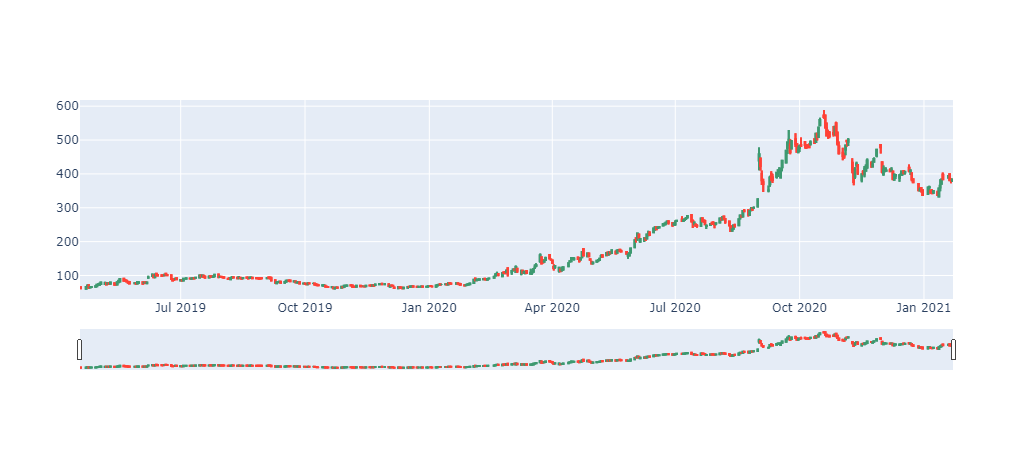

In [238]:
#Plot Bar Chart for ZM

df = pd.read_csv('project_ticker_data.csv')
df.set_index('ticker',inplace=True)
df.drop(columns=['Unnamed: 0'],inplace=True)
zm_df = df.loc['ZM']
fig = go.Figure(data=[go.Candlestick(x=zm_df['Date'],
open=zm_df['Open'],
high=zm_df['High'],
low=zm_df['Low'],
close=zm_df['Close'])])
fig.show()

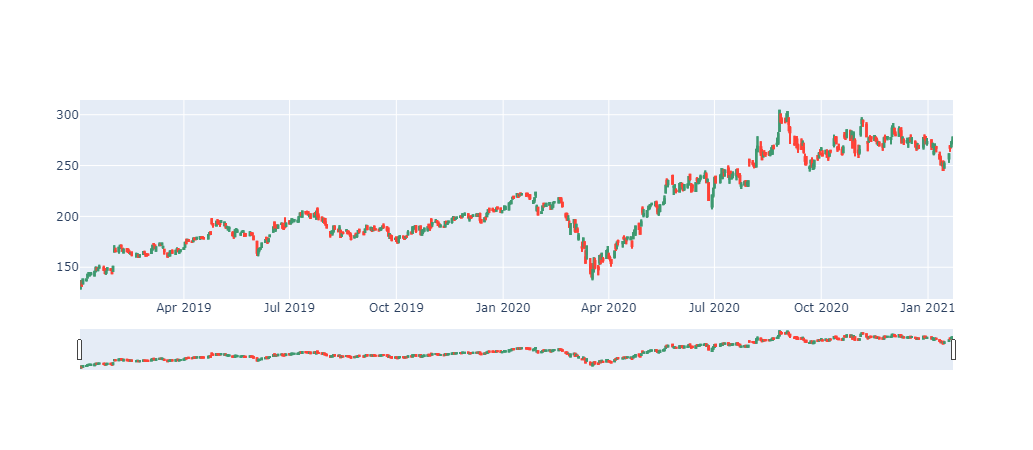

In [237]:
#Plot Bar Chart for FB

df = pd.read_csv('project_ticker_data.csv')
df.set_index('ticker',inplace=True)
df.drop(columns=['Unnamed: 0'],inplace=True)
fb_df = df.loc['FB']
fig = go.Figure(data=[go.Candlestick(x=fb_df['Date'],
open=fb_df['Open'],
high=fb_df['High'],
low=fb_df['Low'],
close=fb_df['Close'])])
fig.show()

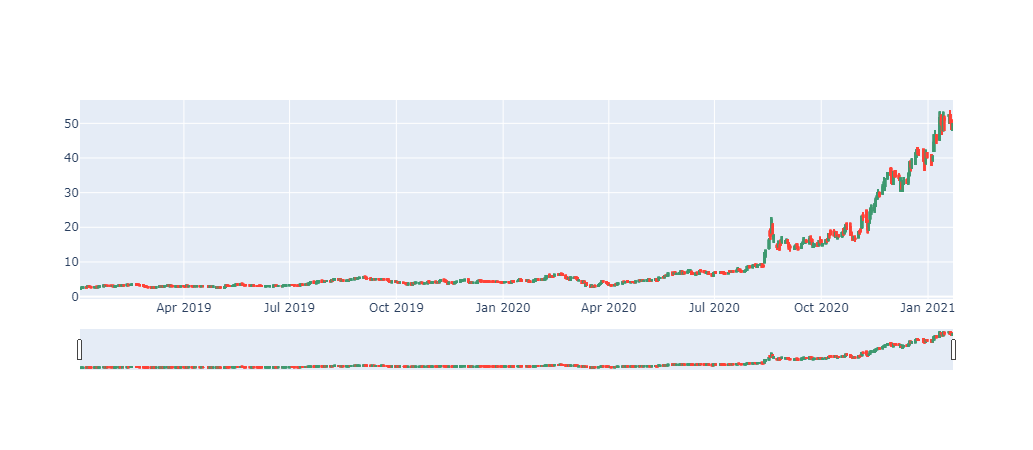

In [236]:
#Plot Bar Chart for GRWG

df = pd.read_csv('project_ticker_data.csv')
df.set_index('ticker',inplace=True)
df.drop(columns=['Unnamed: 0'],inplace=True)
grwg_df = df.loc['GRWG']
fig = go.Figure(data=[go.Candlestick(x=grwg_df['Date'],
open=grwg_df['Open'],
high=grwg_df['High'],
low=grwg_df['Low'],
close=grwg_df['Close'])])
fig.show()

C:\Users\jacob\anaconda3\envs\pyvizenv\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning:

Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.



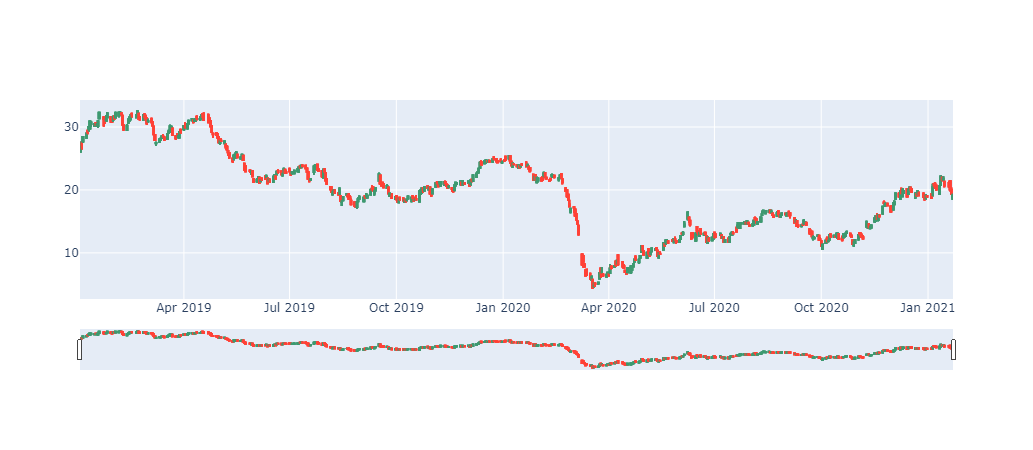

In [255]:
#Plot Bar Chart for HAL

df = pd.read_csv('project_ticker_data.csv')
df.set_index('ticker',inplace=True)
df.drop(columns=['Unnamed: 0'],inplace=True)
lng_df = df.loc['HAL']
lng = go.Figure(data=[go.Candlestick(x=lng_df['Date'],
open=lng_df['Open'],
high=lng_df['High'],
low=lng_df['Low'],
close=lng_df['Close'])])
lng.show()

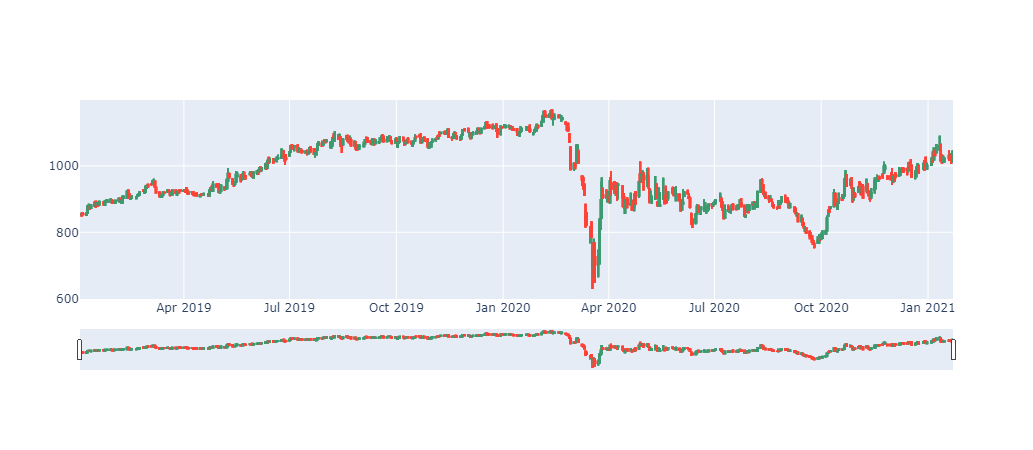

In [234]:
#Plot Bar Chart for WTM

df = pd.read_csv('project_ticker_data.csv')
df.set_index('ticker',inplace=True)
df.drop(columns=['Unnamed: 0'],inplace=True)
wtm_df = df.loc['WTM']
fig = go.Figure(data=[go.Candlestick(x=wtm_df['Date'],
open=wtm_df['Open'],
high=wtm_df['High'],
low=wtm_df['Low'],
close=wtm_df['Close'])])
fig.show()

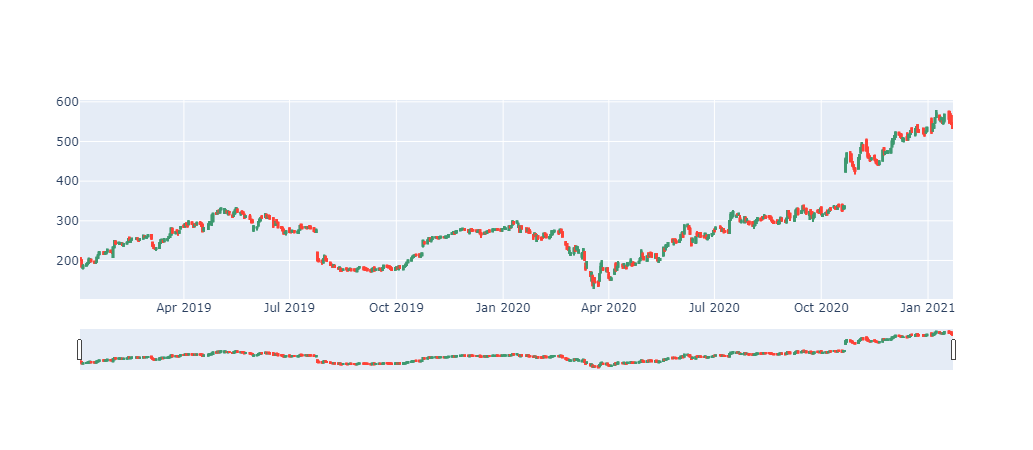

In [233]:
#Plot Bar Chart for ALGN

df = pd.read_csv('project_ticker_data.csv')
df.set_index('ticker',inplace=True)
df.drop(columns=['Unnamed: 0'],inplace=True)
algn_df = df.loc['ALGN']
fig = go.Figure(data=[go.Candlestick(x=algn_df['Date'],
open=algn_df['Open'],
high=algn_df['High'],
low=algn_df['Low'],
close=algn_df['Close'])])
fig.show()

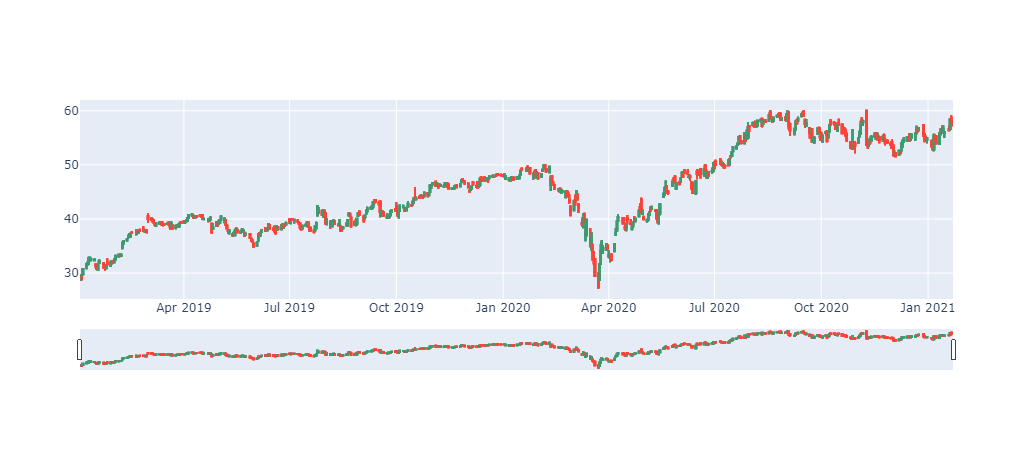

In [230]:
#Plot Bar Chart for MAS

df = pd.read_csv('project_ticker_data.csv')
df.set_index('ticker',inplace=True)
df.drop(columns=['Unnamed: 0'],inplace=True)
mas_df = df.loc['MAS']
fig = go.Figure(data=[go.Candlestick(x=mas_df['Date'],
open=mas_df['Open'],
high=mas_df['High'],
low=mas_df['Low'],
close=mas_df['Close'])])
fig.show()

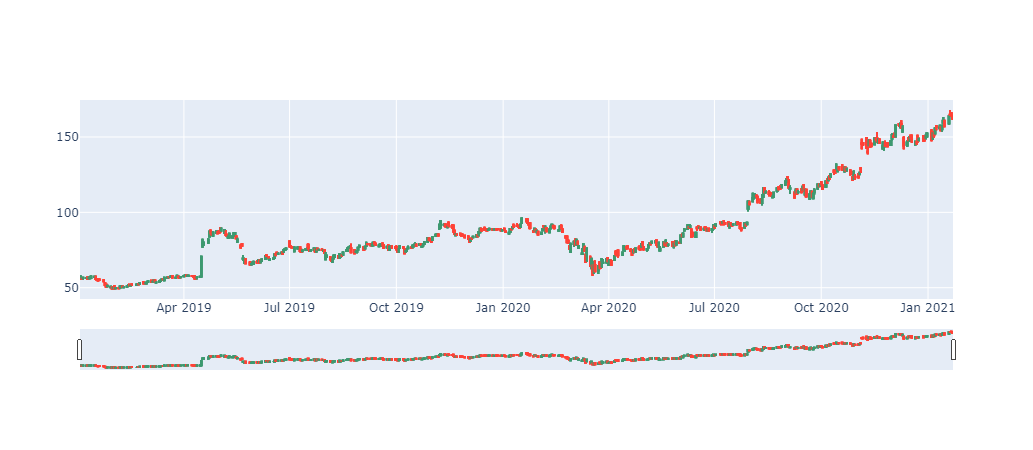

In [229]:
#Plot Bar Chart for QCOM

df = pd.read_csv('project_ticker_data.csv')
df.set_index('ticker',inplace=True)
df.drop(columns=['Unnamed: 0'],inplace=True)
qcom_df = df.loc['QCOM']
fig = go.Figure(data=[go.Candlestick(x=qcom_df['Date'],
open=qcom_df['Open'],
high=qcom_df['High'],
low=qcom_df['Low'],
close=qcom_df['Close'])])
fig.show()

In [49]:
#Plot EPS grouped by sector
eps_graph * eps_sector_graph + profit_margin_graph + earnings_graph + revenue_graph
#Plot Profit Margin grouped by sector
#profit_margin_graph 

#Plot Quarterly Earnings Growth YOY grouped by sector
#earnings_graph
#Plot Quarterly Revenue Growth YOY grouped by sector
#revenue_graph

# Plot 52 week high compared to 52 week low -  grouped by sector



:Layout
   .Overlay.I :Overlay
      .Bars.I  :Bars   [Ticker]   (EPS)
      .Bars.II :Bars   [Sector]   (EPS)
   .Bars.I    :Bars   [Sector]   (ProfitMargin)
   .Bars.II   :Bars   [Ticker]   (QuarterlyEarningsGrowthYOY)
   .Bars.III  :Bars   [Sector]   (QuarterlyRevenueGrowthYOY)

In [48]:


#read in dataframe
data_df = pd.read_csv(Path("join_data.csv"), index_col="Ticker")


#Creating dataframe with unique ticker row & information
summary_df = data_df.drop(columns=['Date'])
unique_sum_df = summary_df.reset_index().drop_duplicates(subset='Ticker',keep='first').set_index('Ticker')

#Plotting Top Earnings Growth YOY Companies
quart_earnings_df = unique_sum_df.sort_values('QuarterlyEarningsGrowthYOY',ascending=False)
top_earnings_df = quart_earnings_df.head(15)
#top_unique_df.head(10)
earnings_graph = top_earnings_df.hvplot.barh(x='Ticker', y='QuarterlyEarningsGrowthYOY',flip_yaxis=True)


#Plotting Top Earnings Per Share Companies
eps_df = unique_sum_df.sort_values('EPS',ascending=False)
top_eps_df = eps_df.head(15)
eps_graph = top_eps_df.hvplot.barh(x='Ticker', y='EPS',flip_yaxis=True)

#Plotting Top Earnings Per Share Sectors
eps_sector_graph = top_eps_df.hvplot.barh(x='Sector', y='EPS',flip_yaxis=True)

#Plotting Top Profit Margin Sectors
pm_df = unique_sum_df.sort_values('ProfitMargin',ascending=False)
top_pm_df = pm_df.head(15)
profit_margin_graph = top_pm_df.hvplot.barh(x='Sector', y='ProfitMargin',flip_yaxis=True)

#Plotting Top Quarterly Revenue Sectors
revenue_df = unique_sum_df.sort_values('QuarterlyRevenueGrowthYOY',ascending=False)
top_revenue_df = revenue_df.head(15)
revenue_graph = top_revenue_df.hvplot.barh(x='Sector', y='QuarterlyRevenueGrowthYOY',flip_yaxis=True)

C:\Users\jacob\anaconda3\envs\pyvizenv\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [75]:
#Display top performers in each sector based on Fundamentals

revenue_df = unique_sum_df.sort_values(['Sector','QuarterlyRevenueGrowthYOY'],ascending=False).groupby('Sector')
final_top_revenue_df = revenue_df.head(1)
final_revenue_graph = final_top_revenue_df.dropna().hvplot.barh(x='Ticker', y='QuarterlyRevenueGrowthYOY',flip_yaxis=True)

quart_earnings_df = unique_sum_df.sort_values(['Sector','QuarterlyEarningsGrowthYOY'],ascending=False).groupby('Sector')
final_top_earnings_df = quart_earnings_df.head(1)
final_earnings_graph = final_top_earnings_df.dropna().hvplot.barh(x='Ticker', y='QuarterlyEarningsGrowthYOY',flip_yaxis=True)

eps_df = unique_sum_df.sort_values(['Sector', 'EPS'],ascending=False).groupby('Sector')
final_top_eps_df = eps_df.head(1)
final_eps_graph = final_top_eps_df.dropna().hvplot.barh(x='Ticker', y='EPS',flip_yaxis=True)

pm_df = unique_sum_df.sort_values(['Sector','ProfitMargin'],ascending=False).groupby('Sector')
final_top_pm_df = pm_df.head(1)
final_profit_margin_graph = final_top_pm_df.dropna().hvplot.barh(x='Ticker', y='ProfitMargin',flip_yaxis=True)

In [133]:
final_revenue_graph

:Bars   [Ticker]   (QuarterlyRevenueGrowthYOY)

In [245]:
final_earnings_graph

:Bars   [Ticker]   (QuarterlyEarningsGrowthYOY)

In [135]:
final_eps_graph

:Bars   [Ticker]   (EPS)

In [246]:
final_profit_margin_graph

:Bars   [Ticker]   (ProfitMargin)

In [45]:
final_top_pm_df

Open        High         Low       Close    Volume  \
Ticker                                                             
NLOK     18.450001   19.110001   18.360001   18.940001   4306400   
EAF      11.190000   11.640000   11.120000   11.620000    793100   
CRON     10.250000   11.440000   10.250000   11.310000   6345300   
WTM     853.000000  856.390015  851.500000  855.000000     11900   
LNG      57.700001   61.049999   57.360001   60.200001   1817500   
HD      169.710007  173.179993  169.050003  172.410004   4242900   
FB      128.990005  137.509995  128.559998  135.679993  28146200   
AMRS      3.270000    3.840000    3.130000    3.780000   1122400   

        QuarterlyEarningsGrowthYOY  QuarterlyRevenueGrowthYOY  ProfitMargin  \
Ticker                                                                        
NLOK                        -0.910                      0.030        1.3180   
EAF                         -0.423                     -0.318        0.3722   
CRON                        -0.886                      0.963        2.7068   
WTM                          3.915                      1.955        0.3357   
LNG                          1.648                     -0.316        0.1133   
HD                           0.257                      0.232        0.0994   
FB                           0.534                      0.332        0.3390   
AMRS                         0.000                     -0.020       -2.2422   

        52WeekHigh  52WeekLow    Beta      EPS  50DayMovingAverage  \
Ticker                                                               
NLOK       24.2366    14.8509  1.0368   5.7018             20.6836   
EAF        12.0000     5.5375  1.0796   1.7790             10.2688   
CRON       11.7500     4.0000  2.0917   0.2870              8.8239   
WTM      1166.7825   629.2100  0.4911  89.1610           1011.3115   
LNG        69.3500    27.0600  1.5798   4.0990             61.9976   
HD        291.0679   138.3077  1.0268  11.5610            270.9482   
FB        304.6700   137.1006  1.1828  10.2270            269.1918   
AMRS       12.2100     1.4000   1.052  -3.3880              7.1503   

        200DayMovingAverage                  Sector  
Ticker                                               
NLOK                20.9569              Technology  
EAF                  7.9373             Industrials  
CRON                 6.8084              Healthcare  
WTM                919.3216      Financial Services  
LNG                 53.8139                  Energy  
HD                 274.1906       Consumer Cyclical  
FB                 267.1647  Communication Services  
AMRS                 4.1202         Basic Materials

In [46]:
final_top_eps_df

Open         High          Low        Close   Volume  \
Ticker                                                                
SNX       32.318665    33.439281    32.318665    33.072536   901100   
LMT      258.359985   265.299988   256.790009   264.730011  1064700   
ALGN     205.320007   207.160004   200.539993   202.119995  1126800   
WTM      853.000000   856.390015   851.500000   855.000000    11900   
LNG       57.700001    61.049999    57.360001    60.200001  1817500   
HD       169.710007   173.179993   169.050003   172.410004  4242900   
GOOGL   1027.199951  1060.790039  1025.280029  1054.680054  1593400   
AMRS       3.270000     3.840000     3.130000     3.780000  1122400   

        QuarterlyEarningsGrowthYOY  QuarterlyRevenueGrowthYOY  ProfitMargin  \
Ticker                                                                        
SNX                          0.213                      0.127        0.0214   
LMT                          0.207                      0.073        0.1045   
ALGN                         0.375                      0.209        0.7600   
WTM                          3.915                      1.955        0.3357   
LNG                          1.648                     -0.316        0.1133   
HD                           0.257                      0.232        0.0994   
GOOGL                        0.620                      0.140        0.2080   
AMRS                         0.000                     -0.020       -2.2422   

        52WeekHigh  52WeekLow    Beta     EPS  50DayMovingAverage  \
Ticker                                                              
SNX        91.6200    21.1674  1.4827  10.214             84.3818   
LMT       431.4521   261.0763  0.9128  24.304            348.0064   
ALGN      579.5000   127.8800   1.677  21.976            534.6852   
WTM      1166.7825   629.2100  0.4911  89.161           1011.3115   
LNG        69.3500    27.0600  1.5798   4.099             61.9976   
HD        291.0679   138.3077  1.0268  11.561            270.9482   
GOOGL    1932.0800  1008.8700  0.9947  51.752           1773.2882   
AMRS       12.2100     1.4000   1.052  -3.388              7.1503   

        200DayMovingAverage                  Sector  
Ticker                                               
SNX                 63.3475              Technology  
LMT                371.6092             Industrials  
ALGN               403.4938              Healthcare  
WTM                919.3216      Financial Services  
LNG                 53.8139                  Energy  
HD                 274.1906       Consumer Cyclical  
GOOGL             1632.3481  Communication Services  
AMRS                 4.1202         Basic Materials

In [124]:
#Slice data by sector

tech_sector = unique_sum_df.loc[unique_sum_df['Sector']=='Technology']
industrials_sector = unique_sum_df.loc[unique_sum_df['Sector']=='Industrials']
healthcare_sector = unique_sum_df.loc[unique_sum_df['Sector']=='Healthcare']
financial_sector = unique_sum_df.loc[unique_sum_df['Sector']=='Financial Services']
energy_sector = unique_sum_df.loc[unique_sum_df['Sector']=='Energy']
consumer_sector = unique_sum_df.loc[unique_sum_df['Sector']=='Consumer Cyclical']
communication_sector = unique_sum_df.loc[unique_sum_df['Sector']=='Communication Services']


#Rank Data
tech_measures = tech_sector.loc[:,['QuarterlyEarningsGrowthYOY', 'QuarterlyRevenueGrowthYOY', 'ProfitMargin', 'EPS']]
ranked_tech_sector = tech_measures.rank(axis=0, ascending=True, method='dense').astype(int)
ranked_tech_sector['sum_total'] = ranked_tech_sector['QuarterlyEarningsGrowthYOY'] + ranked_tech_sector['QuarterlyRevenueGrowthYOY'] + ranked_tech_sector['ProfitMargin'] + ranked_tech_sector[ 'EPS']

industrials_measures = industrials_sector.loc[:,['QuarterlyEarningsGrowthYOY', 'QuarterlyRevenueGrowthYOY', 'ProfitMargin', 'EPS']]
ranked_industrials_sector = industrials_measures.rank(axis=0, ascending=True, method='dense').astype(int)
ranked_industrials_sector['sum_total'] = ranked_industrials_sector['QuarterlyEarningsGrowthYOY'] + ranked_industrials_sector['QuarterlyRevenueGrowthYOY'] + ranked_industrials_sector['ProfitMargin'] + ranked_industrials_sector[ 'EPS']

healthcare_measures = healthcare_sector.loc[:,['QuarterlyEarningsGrowthYOY', 'QuarterlyRevenueGrowthYOY', 'ProfitMargin', 'EPS']]
ranked_healthcare_sector = healthcare_measures.rank(axis=0, ascending=True, method='dense').astype(int)
ranked_healthcare_sector['sum_total'] = ranked_healthcare_sector['QuarterlyEarningsGrowthYOY'] + ranked_healthcare_sector['QuarterlyRevenueGrowthYOY'] + ranked_healthcare_sector['ProfitMargin'] + ranked_healthcare_sector[ 'EPS']

financial_measures = financial_sector.loc[:,['QuarterlyEarningsGrowthYOY', 'QuarterlyRevenueGrowthYOY', 'ProfitMargin', 'EPS']]
ranked_financial_sector = financial_measures.rank(axis=0, ascending=True, method='dense').astype(int)
ranked_financial_sector['sum_total'] = ranked_financial_sector['QuarterlyEarningsGrowthYOY'] + ranked_financial_sector['QuarterlyRevenueGrowthYOY'] + ranked_financial_sector['ProfitMargin'] + ranked_financial_sector[ 'EPS']

energy_measures = energy_sector.loc[:,['QuarterlyEarningsGrowthYOY', 'QuarterlyRevenueGrowthYOY', 'ProfitMargin', 'EPS']]
ranked_energy_sector = energy_measures.rank(axis=0, ascending=True, method='dense').astype(int)
ranked_energy_sector['sum_total'] = ranked_energy_sector['QuarterlyEarningsGrowthYOY'] + ranked_energy_sector['QuarterlyRevenueGrowthYOY'] + ranked_energy_sector['ProfitMargin'] + ranked_energy_sector[ 'EPS']

consumer_measures = consumer_sector.loc[:,['QuarterlyEarningsGrowthYOY', 'QuarterlyRevenueGrowthYOY', 'ProfitMargin', 'EPS']]
ranked_consumer_sector = consumer_measures.rank(axis=0, ascending=True, method='dense').astype(int)
ranked_consumer_sector['sum_total'] = ranked_consumer_sector['QuarterlyEarningsGrowthYOY'] + ranked_consumer_sector['QuarterlyRevenueGrowthYOY'] + ranked_consumer_sector['ProfitMargin'] + ranked_consumer_sector[ 'EPS']


communication_measures = communication_sector.loc[:,['QuarterlyEarningsGrowthYOY', 'QuarterlyRevenueGrowthYOY', 'ProfitMargin', 'EPS']]
ranked_communication_sector = communication_measures.rank(axis=0, ascending=True, method='dense').astype(int)
ranked_communication_sector['sum_total'] = ranked_communication_sector['QuarterlyEarningsGrowthYOY'] + ranked_communication_sector['QuarterlyRevenueGrowthYOY'] + ranked_communication_sector['ProfitMargin'] + ranked_communication_sector[ 'EPS']




QuarterlyEarningsGrowthYOY  QuarterlyRevenueGrowthYOY  ProfitMargin  \
Ticker                                                                        
AMRS                             1                          1             1   

        EPS  sum_total  
Ticker                  
AMRS      1          4

In [139]:
ranked_communication_sector.sort_values('sum_total', ascending=False, inplace=True)

ranked_communication_sector

QuarterlyEarningsGrowthYOY  QuarterlyRevenueGrowthYOY  ProfitMargin  \
Ticker                                                                        
ATVI                             7                          6             7   
ZM                               8                          8             6   
FB                               4                          5             8   
GOOGL                            5                          3             5   
GRVY                             6                          7             3   
TTWO                             3                          2             4   
NFLX                             1                          4             2   
LILA                             2                          1             1   

        EPS  sum_total  
Ticker                  
ATVI      4         24  
ZM        2         24  
FB        7         24  
GOOGL     8         21  
GRVY      3         19  
TTWO      5         14  
NFLX      6         13  
LILA      1          5

In [141]:
ranked_consumer_sector.sort_values('sum_total', ascending=False, inplace=True)
ranked_consumer_sector


QuarterlyEarningsGrowthYOY  QuarterlyRevenueGrowthYOY  ProfitMargin  \
Ticker                                                                        
GRWG                             4                          4             3   
HD                               2                          2             4   
TSLA                             3                          3             2   
JMIA                             1                          1             1   

        EPS  sum_total  
Ticker                  
GRWG      2         13  
HD        4         12  
TSLA      3         11  
JMIA      1          4

In [247]:
ranked_energy_sector.sort_values('sum_total', ascending=False, inplace=True)
ranked_energy_sector

QuarterlyEarningsGrowthYOY  QuarterlyRevenueGrowthYOY  ProfitMargin  \
Ticker                                                                        
LNG                             11                          7            12   
OKE                              6                         11            11   
WMB                              9                         12            10   
VLO                             10                          2             8   
CVX                              8                          8             4   
XOM                              4                          9             9   
MUR                             12                          3             2   
EQT                              7                         10             1   
COP                              2                          1             6   
BP                               1                          6             5   
PSX                              3                          4             7   
HAL                              5                          5             3   

        EPS  sum_total  
Ticker                  
LNG      12         42  
OKE       7         35  
WMB       2         33  
VLO      11         31  
CVX       9         29  
XOM       3         25  
MUR       8         25  
EQT       1         19  
COP      10         19  
BP        6         18  
PSX       4         18  
HAL       5         18

In [144]:
ranked_financial_sector.sort_values('sum_total', ascending=False, inplace=True)
ranked_financial_sector

QuarterlyEarningsGrowthYOY  QuarterlyRevenueGrowthYOY  ProfitMargin  \
Ticker                                                                        
WTM                              7                          6             7   
KKR                              6                          7             5   
SIVB                             3                          4             6   
AFL                              5                          2             4   
VIRT                             2                          5             3   
PYPL                             4                          3             2   
UNM                              1                          1             1   

        EPS  sum_total  
Ticker                  
WTM       7         27  
KKR       1         19  
SIVB      6         19  
AFL       5         16  
VIRT      3         13  
PYPL      2         11  
UNM       4          7

In [145]:
ranked_healthcare_sector.sort_values('sum_total', ascending=False, inplace=True)
ranked_healthcare_sector

QuarterlyEarningsGrowthYOY  QuarterlyRevenueGrowthYOY  ProfitMargin  \
Ticker                                                                        
ALGN                             9                          8            10   
HSIC                             7                          7             6   
CRON                             2                         11            11   
SYK                              5                          4             8   
INCY                            10                          6             3   
VAR                              8                          2             7   
HEXO                             6                         12             4   
UNH                              3                          5             5   
CGC                              6                         10             4   
APHA                             4                          9             2   
BSX                              1                          3             9   
OGI                              6                          1             1   

        EPS  sum_total  
Ticker                  
ALGN     12         39  
HSIC      9         29  
CRON      4         28  
SYK      10         27  
INCY      6         25  
VAR       8         25  
HEXO      2         24  
UNH      11         24  
CGC       1         21  
APHA      5         20  
BSX       7         20  
OGI       3         11

In [146]:
ranked_industrials_sector.sort_values('sum_total', ascending=False, inplace=True)
ranked_industrials_sector

QuarterlyEarningsGrowthYOY  QuarterlyRevenueGrowthYOY  ProfitMargin  \
Ticker                                                                        
MAS                             12                         12            11   
VRSK                            13                         11            12   
ROK                             11                          8            10   
GNRC                            10                         13             9   
LMT                              8                         10             8   
AGCO                            14                         14             7   
AL                               3                          9            13   
EAF                              2                          6            14   
BA                               1                          7             5   
DAL                              7                          5             1   
UAL                              9                          3             2   
AAL                              6                          2             3   
LUV                              5                          4             4   
SPCE                             4                          1             6   

        EPS  sum_total  
Ticker                  
MAS      11         46  
VRSK      7         43  
ROK      13         42  
GNRC      8         40  
LMT      14         40  
AGCO      4         39  
AL        9         34  
EAF       3         25  
BA       12         25  
DAL      10         23  
UAL       6         20  
AAL       5         16  
LUV       2         15  
SPCE      1         12

In [147]:
ranked_tech_sector.sort_values('sum_total', ascending=False, inplace=True)
ranked_tech_sector

QuarterlyEarningsGrowthYOY  QuarterlyRevenueGrowthYOY  ProfitMargin  \
Ticker                                                                        
QCOM                            16                         18            14   
AMD                             17                         16            15   
MSFT                             8                         10            17   
TTD                             12                         13            11   
AAPL                             9                         12            12   
FSLR                            14                         17             6   
INTC                             5                          5            16   
NLOK                             1                          6            18   
EGOV                            11                         15            10   
SNX                              7                          9             4   
MU                              10                          8             9   
NCR                             13                          2             7   
COHR                            18                          4             2   
JBL                             15                          7             3   
CSCO                             4                          3            13   
PTC                              3                         11             8   
RIOT                             6                         14             1   
XRX                              2                          1             5   

        EPS  sum_total  
Ticker                  
QCOM     14         62  
AMD       6         54  
MSFT     17         52  
TTD      11         47  
AAPL     13         46  
FSLR      7         44  
INTC     15         41  
NLOK     16         41  
EGOV      3         39  
SNX      18         38  
MU       10         37  
NCR      12         34  
COHR      8         32  
JBL       5         30  
CSCO      9         29  
PTC       4         26  
RIOT      1         22  
XRX       2         10

In [250]:
top_picks = [ranked_communication_sector.head(1).index.all(), ranked_communication_sector.head(2).index.all(), 
             ranked_communication_sector.head(3).index.all(), ranked_consumer_sector.head(1).index.all(), 
             ranked_energy_sector.head(1).index.all(), ranked_financial_sector.head(1).index.all(), ranked_healthcare_sector.head(1).index.all(),
             ranked_industrials_sector.head(1).index.all(), ranked_tech_sector.head(1).index.all()]

In [251]:
top_picks

['ATVI', 'ZM', 'FB', 'GRWG', 'LNG', 'WTM', 'ALGN', 'MAS', 'QCOM']

In [252]:
# Define Panel Visualization Functions
def QuarterlyEarningsGrowthYOY():
    """Quarterly Earnings Growth Year Over Year."""    
    return final_earnings_graph
#############################################################
def QuarterlyRevenueGrowthYOY():
    """Ranked Quarterly Revenue Growth Year Over Year."""
    return final_revenue_graph
#############################################################
def ProfitMargin():
    """Ranked ProfitMargin."""
    return final_profit_margin_graph
#############################################################
def EPS():
    """Ranks Earnings per share."""
    return final_eps_graph
#############################################################
def Top_Technology_Picks():
    """Top Technology Picks Plot."""
    return ranked_tech_sector
#############################################################
def Top_Industrials_Picks():
    """Top Industrials Picks Plot."""
    return ranked_industrials_sector
#############################################################
def Top_Healthcare_Picks():
    """Top Healthcare Picks Plot."""
    return ranked_healthcare_sector
#############################################################
def Top_Financial_Services_Picks():
    """Top Financial Services Picks Plot."""
    return ranked_financial_sector
#############################################################
def Top_Energy_Picks():
    """Top Energy Picks Plot."""
    return ranked_energy_sector
#############################################################
def Top_Consumer_Cyclical_Picks():
    """Top Consumer Cyclical Picks Plot."""
    return ranked_consumer_sector
#############################################################
def Top_Communication_Services_Picks():
    """Top Communication Services Picks Plot."""
    return ranked_communication_sector
#############################################################
def atvi_candle_stick_graph():
    """Activision Blizzard, Inc. Price Action"""
    df = pd.read_csv('project_ticker_data.csv')
    df.set_index('ticker',inplace=True)
    df.drop(columns=['Unnamed: 0'],inplace=True)
    atvi_df = df.loc['ATVI']
    atvi = go.Figure(data=[go.Candlestick(x=zm_df['Date'],
    open=intc_df['Open'],
    high=intc_df['High'],
    low=intc_df['Low'],
    close=intc_df['Close'])])
    return atvi
#############################################################
def zm_candle_stick_graph():
    """Zoom Video Communications, Inc. Price Action"""
    df = pd.read_csv('project_ticker_data.csv')
    df.set_index('ticker',inplace=True)
    df.drop(columns=['Unnamed: 0'],inplace=True)
    zm_df = df.loc['ZM']
    zm = go.Figure(data=[go.Candlestick(x=zm_df['Date'],
    open=zm_df['Open'],
    high=zm_df['High'],
    low=zm_df['Low'],
    close=zm_df['Close'])])
    return zm
#############################################################

def fb_candle_stick_graph():
    """Facebook Price Action"""
    df = pd.read_csv('project_ticker_data.csv')
    df.set_index('ticker',inplace=True)
    df.drop(columns=['Unnamed: 0'],inplace=True)
    fb_df = df.loc['FB']
    fb = go.Figure(data=[go.Candlestick(x=fb_df['Date'],
    open=fb_df['Open'],
    high=fb_df['High'],
    low=fb_df['Low'],
    close=fb_df['Close'])])
    return fb
#############################################################

def grwg_candle_stick_graph():
    """GrowGeneration Corp. Price Action"""
    df = pd.read_csv('project_ticker_data.csv')
    df.set_index('ticker',inplace=True)
    df.drop(columns=['Unnamed: 0'],inplace=True)
    grwg_df = df.loc['GRWG']
    grwg = go.Figure(data=[go.Candlestick(x=grwg_df['Date'],
    open=grwg_df['Open'],
    high=grwg_df['High'],
    low=grwg_df['Low'],
    close=grwg_df['Close'])])
    return grwg
#############################################################

def lng_candle_stick_graph():
    """Cheniere Energy, Inc. Price Action"""
    df = pd.read_csv('project_ticker_data.csv')
    df.set_index('ticker',inplace=True)
    df.drop(columns=['Unnamed: 0'],inplace=True)
    lng_df = df.loc['HAL']
    lng = go.Figure(data=[go.Candlestick(x=lng_df['Date'],
    open=lng_df['Open'],
    high=lng_df['High'],
    low=lng_df['Low'],
    close=lng_df['Close'])])
    return lng
#############################################################

def wtm_candle_stick_graph():
    """White Mountains Insurance Group, Ltd. Price Action"""
    df = pd.read_csv('project_ticker_data.csv')
    df.set_index('ticker',inplace=True)
    df.drop(columns=['Unnamed: 0'],inplace=True)
    wtm_df = df.loc['WTM']
    wtm = go.Figure(data=[go.Candlestick(x=wtm_df['Date'],
    open=wtm_df['Open'],
    high=wtm_df['High'],
    low=wtm_df['Low'],
    close=wtm_df['Close'])])
    return wtm
#############################################################

def algn_candle_stick_graph():
    """Align Technology, Inc. Price Action"""
    df = pd.read_csv('project_ticker_data.csv')
    df.set_index('ticker',inplace=True)
    df.drop(columns=['Unnamed: 0'],inplace=True)
    algn_df = df.loc['ALGN']
    algn = go.Figure(data=[go.Candlestick(x=algn_df['Date'],
    open=algn_df['Open'],
    high=algn_df['High'],
    low=algn_df['Low'],
    close=algn_df['Close'])])
    return algn
#############################################################

def mas_candle_stick_graph():
    """Masco Corporation Price Action"""
    df = pd.read_csv('project_ticker_data.csv')
    df.set_index('ticker',inplace=True)
    df.drop(columns=['Unnamed: 0'],inplace=True)
    mas_df = df.loc['MAS']
    mas = go.Figure(data=[go.Candlestick(x=mas_df['Date'],
    open=mas_df['Open'],
    high=mas_df['High'],
    low=mas_df['Low'],
    close=mas_df['Close'])])
    return mas
#############################################################

def qcom_candle_stick_graph():
    """QUALCOMM Incorporated Price Action"""
    df = pd.read_csv('project_ticker_data.csv')
    df.set_index('ticker',inplace=True)
    df.drop(columns=['Unnamed: 0'],inplace=True)
    qcom_df = df.loc['QCOM']
    qcom = go.Figure(data=[go.Candlestick(x=qcom_df['Date'],
    open=qcom_df['Open'],
    high=qcom_df['High'],
    low=qcom_df['Low'],
    close=qcom_df['Close'])])
    return qcom
#############################################################

In [239]:
top_picks

['ATVI', 'ZM', 'FB', 'GRWG', 'HAL', 'WTM', 'ALGN', 'MAS', 'QCOM']

In [253]:
column_a = pn.Column(
    "## Introduction",
    #Read Me Stuff
)
column_b = pn.Column(
    "## Quarterly Earnings Growth Year Over Year.",
    QuarterlyEarningsGrowthYOY()
)
column_c = pn.Column(
    "## Quarterly Revenue Growth Year Over Year.",
    QuarterlyRevenueGrowthYOY()
)
column_d = pn.Column(
    "## Profit Margin",
    ProfitMargin()
)
column_e = pn.Column(
    "## Earnings per share",
    EPS()
)
column_f = pn.Column(
    "## Top Technology Picks Plot",
    Top_Technology_Picks()
)
column_g = pn.Column(
    "## Top Industrials Picks Plot",
    Top_Industrials_Picks()
)
column_h = pn.Column(
    "## Top Healthcare Picks Plot",
    Top_Healthcare_Picks()
)
column_i = pn.Column(
    "## Top Financial Services Picks Plot",
    Top_Financial_Services_Picks()
)
column_j = pn.Column(
    "## Top Energy Picks Plot",
    Top_Energy_Picks()
)
column_k = pn.Column(
    "## Top Consumer Cyclical Picks Plot",
    Top_Consumer_Cyclical_Picks()
)
column_l = pn.Column(
    "## Top Communication Services Picks Plot",
    Top_Communication_Services_Picks()
)
column_m = pn.Column(
    "## Ticker Data Price Data Over Time Graph",
    qcom_candle_stick_graph()
)

column_n = pn.Column(
    "## Ticker Data Price Data Over Time Graph",
    mas_candle_stick_graph()
)
column_o = pn.Column(
    "## Ticker Data Price Data Over Time Graph",
    algn_candle_stick_graph()
)
column_p = pn.Column(
    "## Ticker Data Price Data Over Time Graph",
    wtm_candle_stick_graph()
)
column_q = pn.Column(
    "## Ticker Data Price Data Over Time Graph",
    hal_candle_stick_graph()
)
column_r = pn.Column(
    "## Ticker Data Price Data Over Time Graph",
    grwg_candle_stick_graph()
)
column_s = pn.Column(
    "## Ticker Data Price Data Over Time Graph",
    fb_candle_stick_graph()
)
column_t = pn.Column(
    "## Ticker Data Price Data Over Time Graph",
    zm_candle_stick_graph()
)
column_u = pn.Column(
    "## Ticker Data Price Data Over Time Graph",
    atvi_candle_stick_graph()
)
# Create tabs
tabs = pn.Tabs(
    ("Introduction", column_a), ("Quarterly Earnings Growth Year Over Year", column_b), ("Quarterly Revenue Growth Year Over Year", column_c), ("Profit Margin", column_d), ("EPS", column_e), ("Top Technology Picks", column_f), ("Top Industrials Picks", column_g), ("Top Healthcare Picks", column_h), ("Top Financial Services Picks", column_i), ("Top Energy Picks", column_j), ("Top Consumer Cyclical Picks", column_k), ("Top Communication Services Picks", column_l), ("Ticker Data Price Data Over Time Graph", column_m)
)
tabs.servable()

C:\Users\jacob\anaconda3\envs\pyvizenv\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning:

Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.



Tabs
    [0] Column
        [0] Markdown(str)
    [1] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
    [2] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
    [3] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
    [4] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
    [5] Column
        [0] Markdown(str)
        [1] DataFrame(DataFrame)
    [6] Column
        [0] Markdown(str)
        [1] DataFrame(DataFrame)
    [7] Column
        [0] Markdown(str)
        [1] DataFrame(DataFrame)
    [8] Column
        [0] Markdown(str)
        [1] DataFrame(DataFrame)
    [9] Column
        [0] Markdown(str)
        [1] DataFrame(DataFrame)
    [10] Column
        [0] Markdown(str)
        [1] DataFrame(DataFrame)
    [11] Column
        [0] Markdown(str)
        [1] DataFrame(DataFrame)
    [12] Column
        [0] Markdown(str)
        [1] Plotly(Figure)

In [241]:
top_picks

['ATVI', 'ZM', 'FB', 'GRWG', 'HAL', 'WTM', 'ALGN', 'MAS', 'QCOM']